<a href="https://colab.research.google.com/github/DivyaThakur24/Tensorflow/blob/master/MLWithTensorflow2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Traditional Programming

---

> > > > > >  **Equation --> y = 2.5 * x + 3**

|    x    |   -10   |   -5     |    0    |   2    |  100  |    50     | 
|---------|----------|-----------|---------|---------|------------|---------|
|    y    |   -22   |  -9.5   |    3    |    8   |  253  |  126.5 |

---

In [1]:
x = -10

In [2]:
y = 2.5 * x + 3

In [3]:
print("x = {} , y = {}".format(x, y))

x = -10 , y = -22.0


# Machine Learning with Tensorflow


---



> > > > > >  **Equation --> y = 2.5 * x + 3**

|    x    |   -10   |   -5     |    0    |   2    |  100  |    50     | 
|---------|----------|-----------|---------|---------|------------|---------|
|    y    |   -22   |  -9.5   |    3    |    8   |  253  |  126.5 |

---


  <center>
  
  <img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2016/07/5-Step-Life-Cycle-for-Neural-Network-Models-in-Keras.png" width="150px" />

</center>

In [4]:
import tensorflow as tf
import numpy as np
#tf.logging.set_verbosity(tf.logging.ERROR)

In [5]:
x = np.array([-10, -5, 0,  2, 100], dtype=float)
y = np.array([-22, -9.5, 3, 8, 253], dtype=float)

In [6]:
print("x = {}, y={}".format(x, y))

x = [-10.  -5.   0.   2. 100.], y=[-22.   -9.5   3.    8.  253. ]


<center>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/99/Neural_network_example.svg/220px-Neural_network_example.svg.png"/>

</center>

In [7]:
layer = tf.keras.layers.Dense(units=1, input_shape=[1])

###Define the Model

<img src="https://miro.medium.com/max/1800/1*WP0sqq0uyq_bCGZJQTAb2g.png" width=650 />



In [8]:
model = tf.keras.Sequential([layer])

###Compile the Model

In [9]:
model.compile(loss='mean_squared_error', 
              optimizer=tf.keras.optimizers.Adam(0.1))

###Train the Model (Fit Network)

In [10]:
train = model.fit(x, y,epochs=100, verbose=False)

###Evaluate the Model

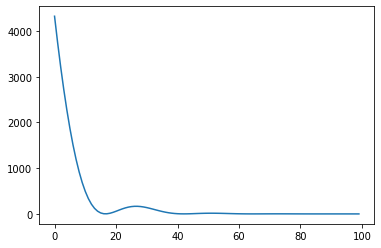

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train.history['loss'])

###Test the Model(Make Predictions)

In [12]:
model.predict([50])

array([[127.41527]], dtype=float32)

In [13]:
layer.get_weights()

[array([[2.5014641]], dtype=float32), array([2.3420644], dtype=float32)]

Further Exploration for GPU users (added by Synchronicity89)
Put the code into a function

In [14]:
#import matplotlib.pyplot as plt                 if you haven't already.  also make it plot inline:
%matplotlib inline
def DefineCompileTrainEvaluate(xInput, yOutput, numUnits, unitShape, learningRate, numEpochs, xInputToPredictYFrom, anotherLayer=None):
    layer = tf.keras.layers.Dense(units=numUnits, input_shape=[unitShape])
    layer2use = [layer]
    if(anotherLayer != None):
        layer2use = [layer, anotherLayer]
    model = tf.keras.Sequential(layer2use)
    model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learningRate))
    train = model.fit(xInput, yOutput,epochs=numEpochs, verbose=False)
    plt.plot(train.history['loss'])
    print(model.predict([xInputToPredictYFrom]))
    if(anotherLayer != None):
        return model,layer, layer2use
    else:
        return model,layer

Test the function with the same values as before.  In all these examples cut the number of epochs in half if you aren't using a GPU 

[[127.083435]]


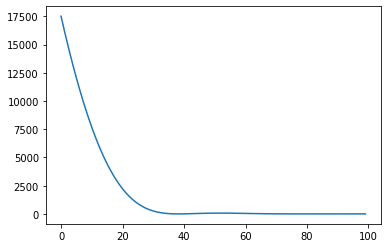

In [15]:
result = DefineCompileTrainEvaluate(x, y, 1, 1, 0.1, 100, 50)

In [16]:
result[1].get_weights()

[array([[2.4832952]], dtype=float32), array([2.9186811], dtype=float32)]

Run the exact same thing several times, to see what the different randomization does.

[[127.01901]]


[array([[2.478593]], dtype=float32), array([3.0893521], dtype=float32)]

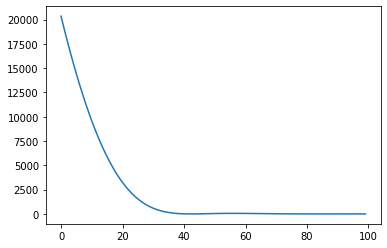

In [17]:
result = DefineCompileTrainEvaluate(x, y, 1, 1, 0.1, 100, 50)
result[1].get_weights()

[[127.699036]]


[array([[2.503644]], dtype=float32), array([2.5168362], dtype=float32)]

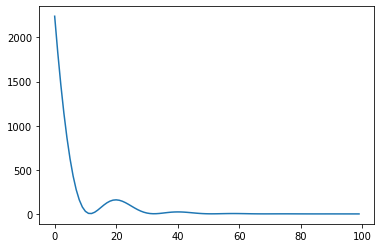

In [18]:
result = DefineCompileTrainEvaluate(x, y, 1, 1, 0.1, 100, 50)
result[1].get_weights()

Create much more data for x and y

In [19]:
x = np.linspace(-1000, 1000, num=2001)

In [20]:
print(x)

[-1000.  -999.  -998. ...   998.   999.  1000.]


Use one of the most powerful features of numpy: vectors.  Here x is a vector so create another vector y that contains the calculated values of the linear equation

In [21]:
y = 2.5 * x + 3

In [22]:
print(y)

[-2497.  -2494.5 -2492.  ...  2498.   2500.5  2503. ]


If you are not sure tensorflow will use the GPU, change 300 to 100, even so this can take many minutes to execute.  To use GPU, if available, pip install tensorflow-gpu

[[7503.]]


[array([[2.5]], dtype=float32), array([2.9999993], dtype=float32)]

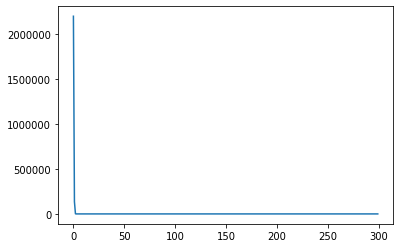

In [23]:
result = DefineCompileTrainEvaluate(x, y, 1, 1, 0.05, 300, 3000)
result[1].get_weights()

Test to see if the predicted value matches.  Should be close or exactly matching the value above.

In [24]:
print(2.5*3000 + 3)

7503.0


The get_weights() shows that the exact slope and y intercept are being used as weights.  Let's see how well it does if much fewer epochs are used

[[2500003.]]


[array([[2.5]], dtype=float32), array([2.999965], dtype=float32)]

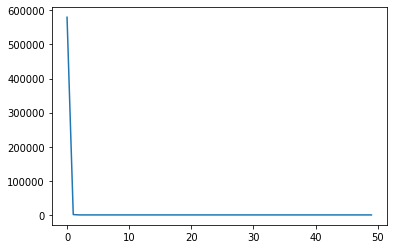

In [25]:
result = DefineCompileTrainEvaluate(x, y, 1, 1, 0.05, 50, 1000000)
result[1].get_weights()

Explore what happens when the layers are changed, by adding one more neuron in a new layer.

[[2499948.2]]


[array([[-1.3998363]], dtype=float32), array([-1.1099664], dtype=float32)]

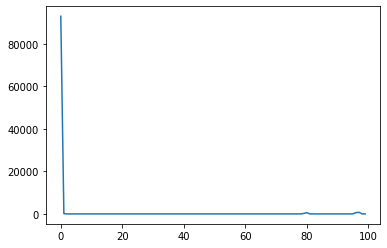

In [26]:
result = DefineCompileTrainEvaluate(x, y, 1, 1, 0.100, 100, 1000000, anotherLayer=tf.keras.layers.Dense(units=1, input_shape=[1]))
result[1].get_weights()

The 2 layers are now sharing the workload with a lot of randomness as to how they share it. This calculation shows how the two sets of weights are sharing the load. The calculated number should be the same as above.

In [27]:
firstWeights = result[2][0].get_weights()
secondWeights = result[2][1].get_weights()
print(secondWeights[0][0] *(firstWeights[0][0]*1000000 + firstWeights[1][0]) + secondWeights[1][0])

[2499948.44071817]


change to an exponential function, and hope that the two layers will calculate it

In [28]:
y = x**2

[[328979.12]]


[array([[0.02295135]], dtype=float32), array([669.2686], dtype=float32)]

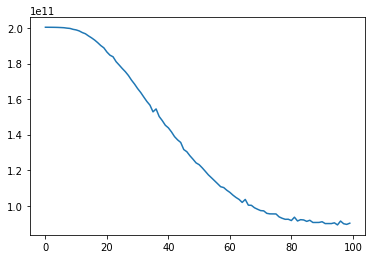

In [29]:
result = DefineCompileTrainEvaluate(x, y, 1, 1, 0.100, 100, 500, anotherLayer=tf.keras.layers.Dense(units=1, input_shape=[1]))
result[1].get_weights()

In [30]:
print(y)

[1000000.  998001.  996004. ...  996004.  998001. 1000000.]


In [31]:
firstWeights = result[2][0].get_weights()
secondWeights = result[2][1].get_weights()
print(secondWeights[0][0] *(firstWeights[0][0]*500 + firstWeights[1][0]) + secondWeights[1][0])

[328979.12]


It appears that the 2 layers are not enough to predict the exponential function.  In science, a negative outcome is just as valid as a positive outcome.  A one layer 2 neuron net would probably be able to do it, but that is a different experiment.  Let's stick with layers with a single neuron and try another linear function

In [32]:
y = 3.5 * (2.5 * x + 3) + 9

[[4394.502]]


[array([[3.133817]], dtype=float32), array([5.841561], dtype=float32)]

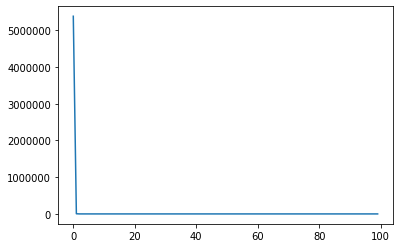

In [33]:
result = DefineCompileTrainEvaluate(x, y, 1, 1, 0.100, 100, 500, anotherLayer=tf.keras.layers.Dense(units=1, input_shape=[1]))
result[1].get_weights()

In [34]:
firstWeights = result[2][0].get_weights()
secondWeights = result[2][1].get_weights()
print(secondWeights[0][0] *(firstWeights[0][0]*500 + firstWeights[1][0]) + secondWeights[1][0])
print(firstWeights)
print(secondWeights)
print(3.5 * (2.5 * 500 + 3) + 9)

[4394.502]
[array([[3.133817]], dtype=float32), array([5.841561], dtype=float32)]
[array([[2.7921236]], dtype=float32), array([3.1896908], dtype=float32)]
4394.5


In [35]:
print(3.5 * 2.5)
print(secondWeights[0][0]  * firstWeights[0][0])

8.75
[8.750004]
